## COP528 Applied Machine Learning Coursework 


In this coursework you will apply what you have learnt in this module to solve real-world problems, both with classical machine learning and popular deep learning methods. The coursework has two tasks, the first task is about designing a pipeline to use ML methods to solve a predefined task (60%), and the second task is about using a Convolutional Neural Network (CNN) for image analysis (40%).

### Task 1: Machine Learning Pipeline (60%)

Design a pipeline, an evaluation strategy, and a set of experiments to determine the best parameters and machine learning algorithm, based on the results of empirical evaluations derived from the dataset (for achieving this, you could compare different algorithms if needed). Ensure that you prepare code that takes the file name as the only input parameter and outputs the results of evaluation metrics, e.g., accuracy, recall and F1-score etc. 

Scenario: A large multinational corporation decides to speed up its first-round promotion process to improve its efficiency due to the large number of staff members in the company. One of the problems is identifying the right people for promotion (only for managerial positions and below) and to prepare them in time to avoid delay of the promotion. The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. Multiple attributes have been provided around Employee's past and current performance along with demographics. These features are:

•	`employee_id`: Unique ID for employee

•	`department`: Department of employee

•	`region`: Region of employment (unordered)

•	`education`: Education Level

•	`gender`: Gender of Employee

•	`recruitment_channel`: Channel of recruitment for employee

•	`nooftrainings`: no of other trainings completed in previous year on soft skills, technical skills etc.

•	`age`: Age of Employee

•	`previousyearrating`: Employee Rating for the previous year

•	`lengthofservice`: Length of service in years

•	`awards_won?`: if awards won during previous year then 1 else 0

•	`avgtrainingscore`: Average score in current training evaluations

•	`is_promoted`: (Target) Recommended for promotion


Expected output:

•	Predict whether a potential candidate will be promoted or not after the board evaluation process.


### Loading data

In [176]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [177]:
# load data, using relative file paths
import pandas as pd
prom_data = pd.read_csv("drive/My Drive/Colab Notebooks/datasets/promotion_dataset.csv")

prom_data = pd.DataFrame(prom_data)

prom_data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,0,54,0


In [178]:
# from google.colab import files
# uploaded = files.upload()

In [179]:
# import io
# import pandas as pd

# prom_data = pd.read_csv(io.BytesIO(uploaded['promotion_dataset.csv']))

# prom_data = pd.DataFrame(prom_data)

# prom_data.head(10)

### Exploring the data

First, eplore the data a bit.

In [180]:
# how many rows and columns
print(prom_data.shape)
print()

# get column names
print(prom_data.columns)
print()

# how many people got promoted
print(prom_data.is_promoted.value_counts())
print()

# summarize dataset
print(prom_data.describe(include = "all"))
print()

# data types of columns
print(prom_data.dtypes)

(54808, 13)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

0    50140
1     4668
Name: is_promoted, dtype: int64

         employee_id         department  ... avg_training_score   is_promoted
count   54808.000000              54808  ...       54808.000000  54808.000000
unique           NaN                  9  ...                NaN           NaN
top              NaN  Sales & Marketing  ...                NaN           NaN
freq             NaN              16840  ...                NaN           NaN
mean    39195.830627                NaN  ...          63.386750      0.085170
std     22586.581449                NaN  ...          13.371559      0.279137
min         1.000000                NaN  ...          39.000000      0.000000
25%     19669.750000                NaN  ...    

This may be a good time to do some visualisations, to see if there are any relationships between different attributes, as well as the class.

Also, `employee_id` can be removed, as it is a unique number given to every employee, and so is irrelevant to the analysis. 

In [181]:
del prom_data['employee_id']

prom_data.shape

(54808, 12)

First, look at the spread of data for numeric variables.

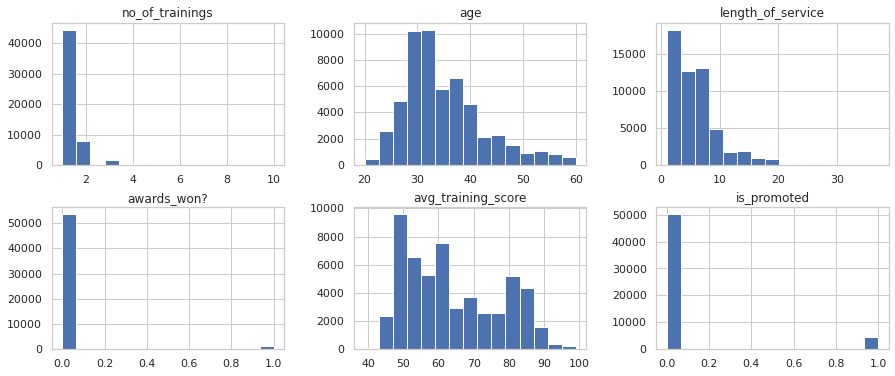

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

# set variables for numerical, and categorical data
numeric = ['no_of_trainings', 'age', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']
categorical = ['department', 'region', 'education', 'gender', 'recruitment_channel']

# histogram of numeric data
prom_data[numeric].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.savefig('hist1.png')

We can see that age is somewhat normally distributed, while avg_training_score is more bimodal. Most employees are not promoted, and even fewer have won awards. Both length_of_service and no_of_trainings are bunched around zero.

Now, visualise the categorical data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

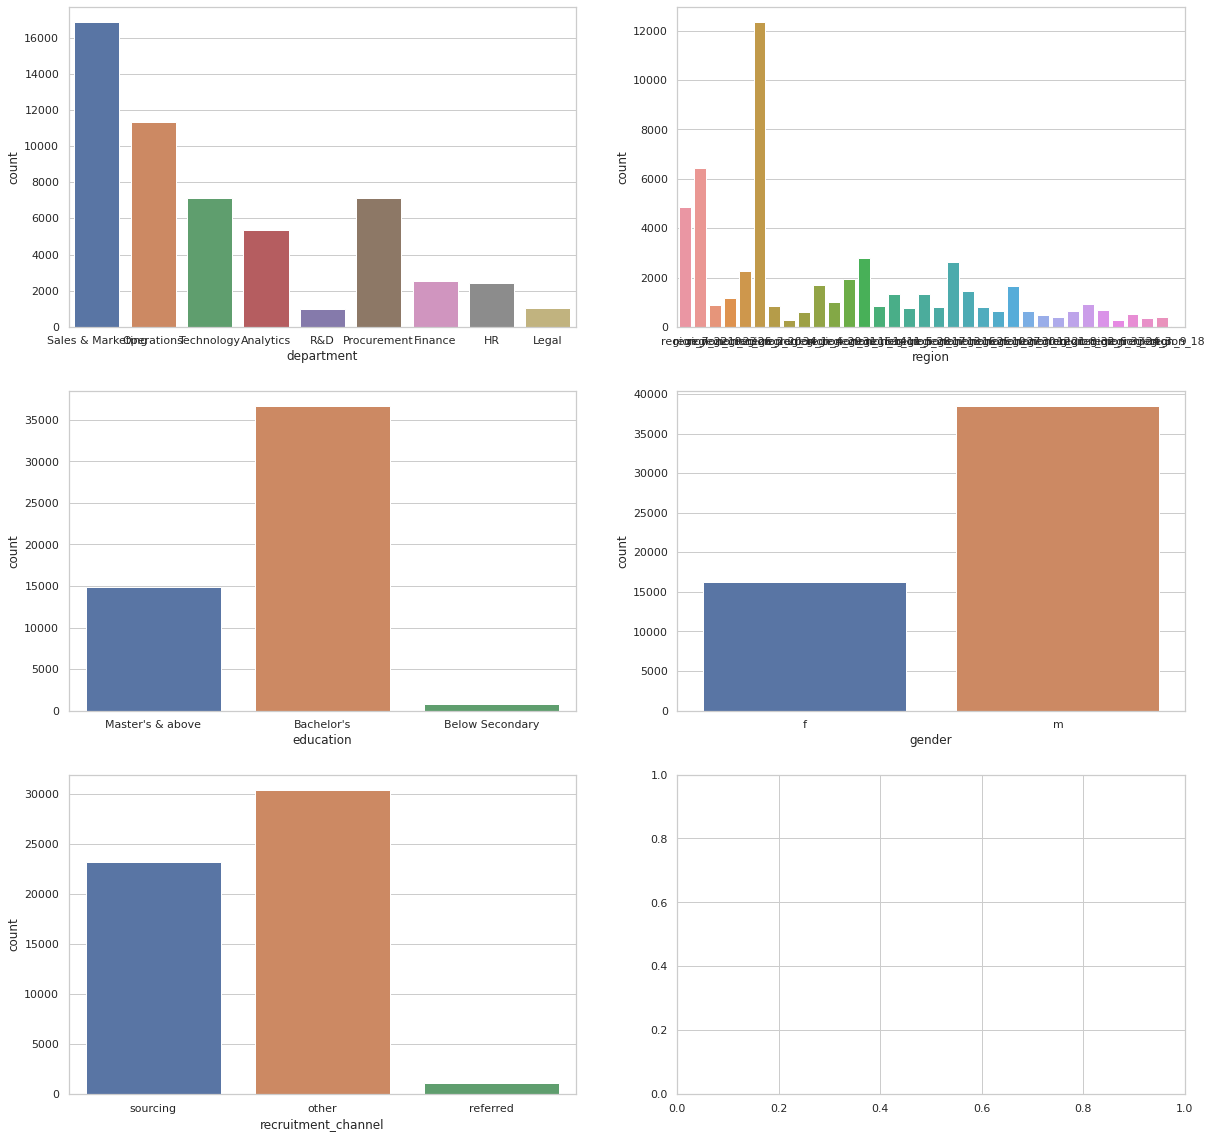

In [183]:
# plot relationships on subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(prom_data[variable], ax=subplot)
plt.savefig('bar1.png')

Here we can see that male employees outnumber female employees roughly 2:1. Also, the vast majority of employees are educated to at least degree level, and very few employees have been referred.

Next, split the plots by `is_promoted`, to see if there are differences here.

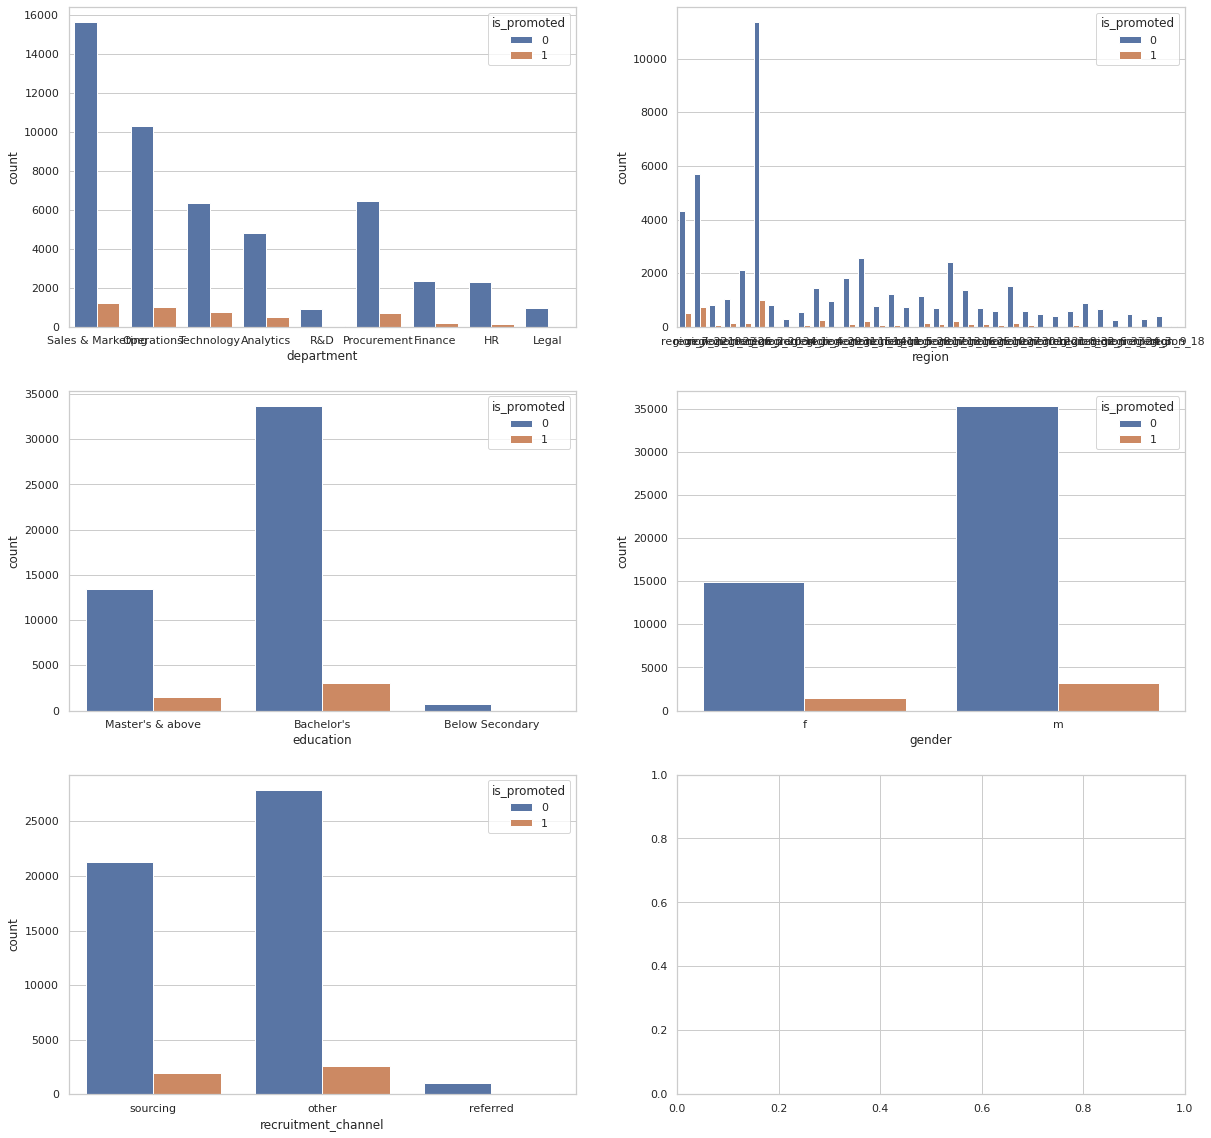

In [184]:
import matplotlib.pyplot as plt

# plot relationships on subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data= prom_data, ax=subplot, hue="is_promoted")

It's hard to tell if, in categories where there are lower counts, such as 'referred' in `recruitment_channel`, nobody was promoted or whether people werer promoted in the same proportions and so it's hard to see if prople got promoted, or if nobody got promoted at all. We'll look into this in more detail now.

In [185]:
# separate data by recruitemnt channel
sourcing = prom_data.loc[prom_data['recruitment_channel'] == 'sourcing']
other = prom_data.loc[prom_data['recruitment_channel'] == 'other']
referred = prom_data.loc[prom_data['recruitment_channel'] == 'referred']

print(sourcing['is_promoted'].value_counts())
print()
print(other['is_promoted'].value_counts())
print()
print(referred['is_promoted'].value_counts())

0    21246
1     1974
Name: is_promoted, dtype: int64

0    27890
1     2556
Name: is_promoted, dtype: int64

0    1004
1     138
Name: is_promoted, dtype: int64


It seems that all three categories in recruitment_channel are promoted in roughly the same proportions

Next, look at relationships between numeric attributes and the class.

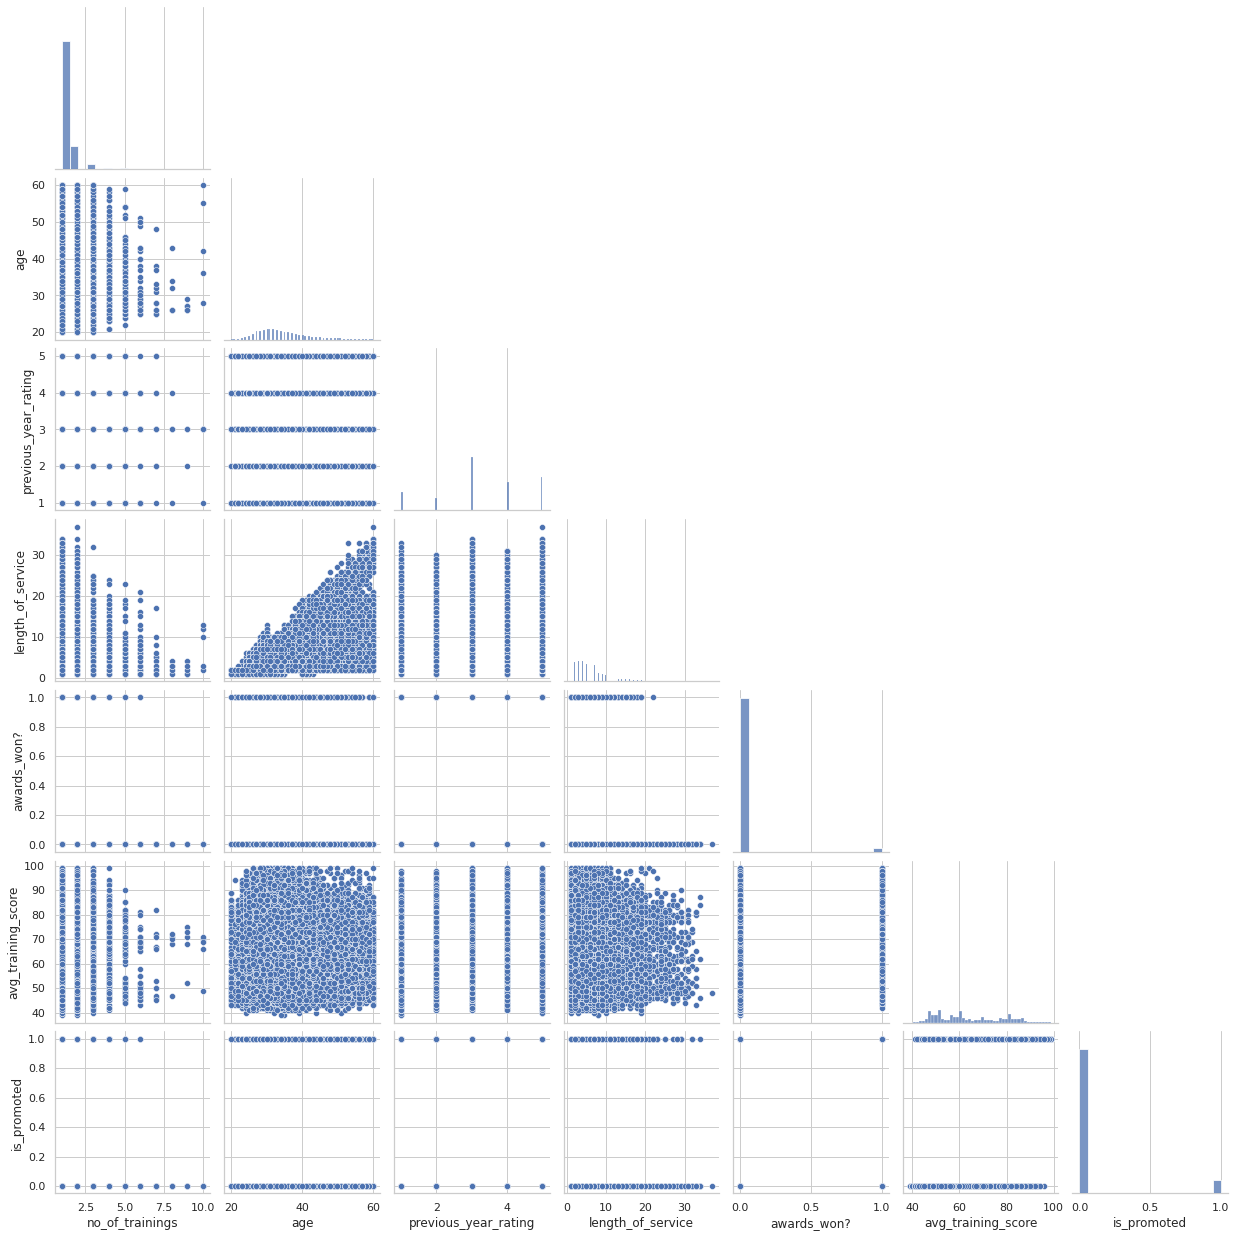

In [186]:
# do pair plot to see all numeric relationships
sns.pairplot(prom_data, corner=True)

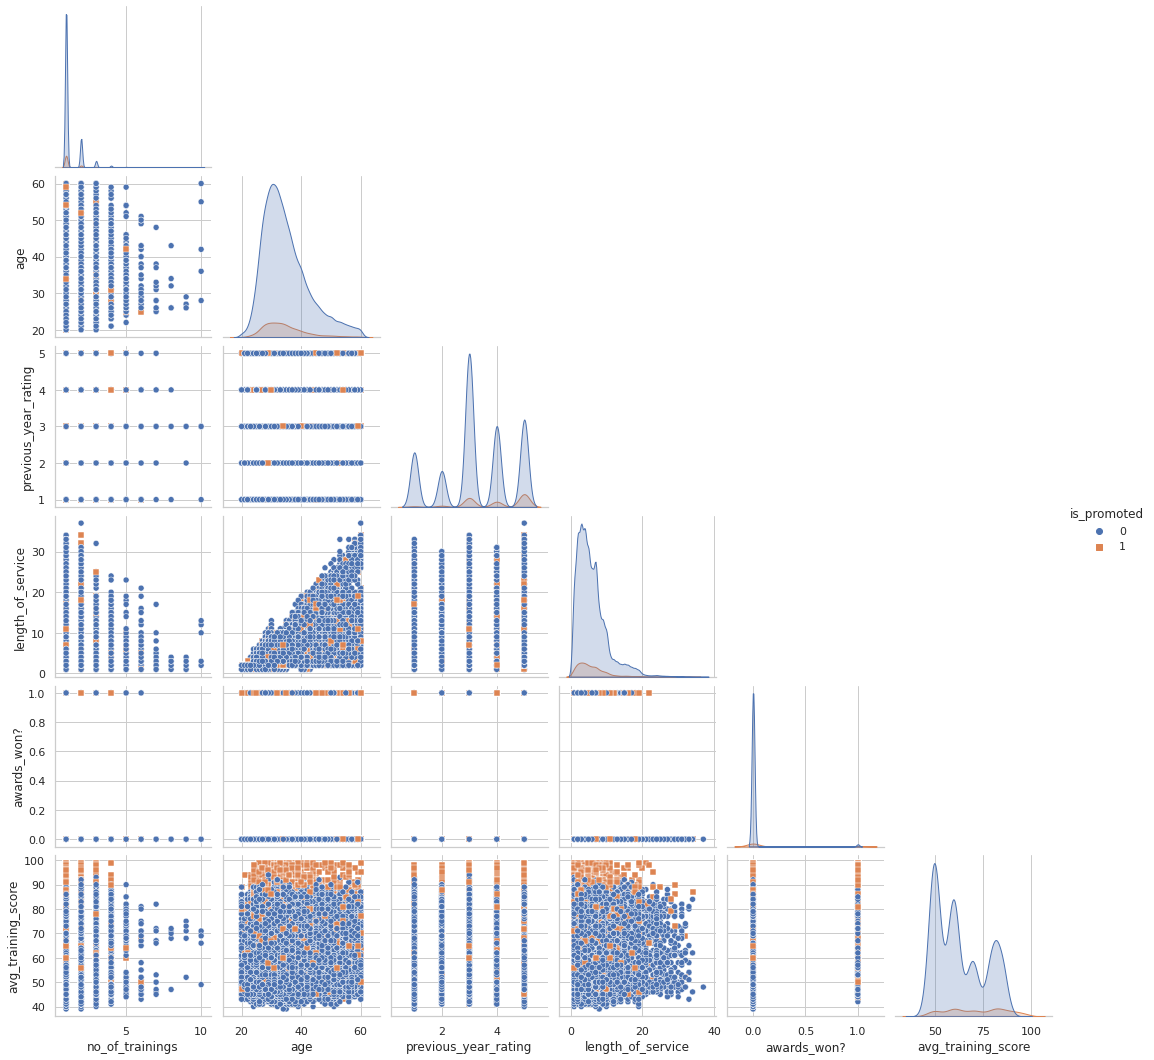

In [187]:
# do pair plot to see all relationships
sns.pairplot(prom_data, hue="is_promoted",  markers=["o", "s"], corner=True)
plt.savefig('PAIR1.png')

From this pairplot, we can see that age and length of service appear to have little influence on whether someone is promoted. Training score and previous year rating, however, do seem to matter. Strangely, people who have worked there longer seem to have had fewer trainings.   

A correlation heatmap could visualise this further.

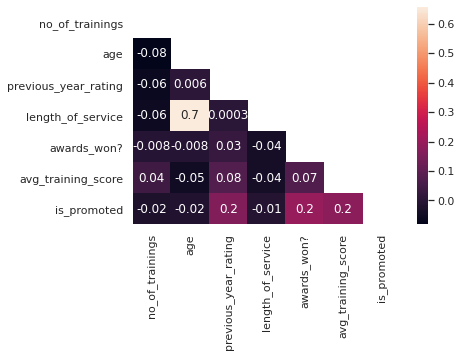

In [188]:
import numpy as np

# plot a heatmap to show which variables correlate with the class, and with each other
sns.heatmap(prom_data.corr(), annot = True, fmt='.1g', mask=np.triu(prom_data.corr()))
plt.savefig('corr1.png')

Here we can see that age, number of trainings, and length of service do not correlate with is_promoted very strongly at all. Age and length of service correlate quite strongly with each other, which makes sense. These variables could possibly be removed from analysis to reduce dimensionality.

Going back to the categorical attributes, let's see if any of the levels of the categorical attributes affect is_promoted. Let's look at the proportion of each level of an attribute that is pormoted

In [189]:
# make variable for getting proportion of each level of a category that are promoted
def promoted_proportion(df, variable, level):
    prom = df.loc[df[variable] == level]['is_promoted'].value_counts()
    return prom[1]/(prom[0] + prom [1])

In [190]:
categorical = ['department', 'region', 'education', 'gender', 'recruitment_channel']

First, look at department

In [191]:
# declare empty list for levels of department 
department_levels = []
# get unique levels
for level in prom_data['department']:
    if level not in department_levels:
        department_levels.append(level)
        

for level in department_levels:
    print(level, ':', promoted_proportion(prom_data, 'department', level))

Sales & Marketing : 0.07203087885985748
Operations : 0.0901480437081424
Technology : 0.10759316335107873
Analytics : 0.09566517189835576
R&D : 0.06906906906906907
Procurement : 0.0963855421686747
Finance : 0.08123028391167192
HR : 0.05624483043837883
Legal : 0.05101058710298364


There do seem to be some differences between levels of department in the proportion of employees that are promoted.

Next, look at region

In [192]:
# declare empty list for levels of region 
region_levels = []
# get unique levels
for level in prom_data['region']:
    if level not in region_levels:
        region_levels.append(level)
        

for level in region_levels:
    print(level, ':', promoted_proportion(prom_data, 'region', level))

region_7 : 0.10654552963039439
region_22 : 0.11418792781580585
region_19 : 0.06064073226544622
region_23 : 0.11659574468085106
region_26 : 0.06327433628318584
region_2 : 0.08012638742607146
region_20 : 0.05764705882352941
region_34 : 0.0273972602739726
region_1 : 0.09508196721311475
region_4 : 0.1444509688784498
region_29 : 0.043259557344064385
region_31 : 0.056847545219638244
region_15 : 0.07905982905982906
region_14 : 0.07496977025392987
region_11 : 0.05627376425855513
region_5 : 0.04569190600522193
region_28 : 0.11684370257966616
region_17 : 0.13693467336683418
region_13 : 0.08685800604229607
region_16 : 0.0696245733788396
region_25 : 0.12576312576312576
region_10 : 0.0787037037037037
region_27 : 0.07896323086196504
region_30 : 0.0898021308980213
region_12 : 0.066
region_21 : 0.043795620437956206
region_8 : 0.08091603053435115
region_32 : 0.042328042328042326
region_6 : 0.0463768115942029
region_33 : 0.03717472118959108
region_24 : 0.03543307086614173
region_3 : 0.1069364161849711
r

There are some pretty big differences here, with some region proportions being an around order of magnitude lower than others (eg region_9 vs region_4)

Next, look at education

In [193]:
# declare empty list for levels of education 
education_levels = []
# get unique levels
for level in prom_data['education']:
    if level not in education_levels:
        education_levels.append(level)

# remove null value        
education_levels.pop(2)    

education_levels

for level in education_levels:
    print(level, ':', promoted_proportion(prom_data, 'education', level))


Master's & above : 0.09855946398659966
Bachelor's : 0.0820311434726881
Below Secondary : 0.08322981366459627


There's very little difference between 'Bachelor's' and 'Below Secondary', but 'Master's and above' are more likely to be promoted. Perhaps, this attribute could be changed to Masters_yes, with 1 as 'Master's and above' and 0 as anything else in the final dataset.

Next, look at gender

In [194]:
# declare empty list for levels of gender 
gender_levels = []
# get unique levels
for level in prom_data['gender']:
    if level not in gender_levels:
        gender_levels.append(level)
        

for level in gender_levels:
    print(level, ':', promoted_proportion(prom_data, 'gender', level))

f : 0.08993379107405591
m : 0.08315149625935161


Here we can see that fmeales are slightly more likely to be promoted than males. It would probably be a good idea to address this gender inequality in the model we build to automate the first-round promotion process.

Finally, look at recruitment_channel

In [195]:
# declare empty list for levels of recruitment_channel 
recruitment_channel_levels = []
# get unique levels
for level in prom_data['recruitment_channel']:
    if level not in recruitment_channel_levels:
        recruitment_channel_levels.append(level)
        

for level in recruitment_channel_levels:
    print(level, ':', promoted_proportion(prom_data, 'recruitment_channel', level))

sourcing : 0.08501291989664082
other : 0.0839519148656638
referred : 0.12084063047285463


A very similar proportion of 'sourcing' or 'other' are promoted, but 'referred' people are around 50% more likely to be promoted. Perhaps, this attribute could be changed to recruitment_channel_referred, with 1 as 'referred' and 0 as anything else in the final dataset.

### Cleaning the data

Next, check for null values.

In [196]:
# count null values for each column
prom_data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [197]:
# get column values for each column with null values
print(prom_data.education.unique())
print()
print(prom_data.previous_year_rating.unique())

["Master's & above" "Bachelor's" nan 'Below Secondary']

[ 5.  3.  1.  4. nan  2.]


So, for `previous_year_rating`, null values are probably down to people not being there the previous year. To check this, see how long people have been at the job who have a null value here.

In [198]:
# select rows where previous_year_rating is null, as well as the length_of_service column
previous_year_rating_null = prom_data.loc[prom_data['previous_year_rating'].isnull() == True].length_of_service
print(previous_year_rating_null)
print()

# check if these values are all == 1
print(previous_year_rating_null.unique())

10       1
23       1
29       1
56       1
58       1
        ..
54703    1
54734    1
54746    1
54773    1
54801    1
Name: length_of_service, Length: 4124, dtype: int64

[1]


So, we can see that all rows where `previous_year_rating` is null, the person had only been at the job for a year, meaning that they had no previous year rating. `education` is more confusing, since there is a 'below secondary' value.  

To deal with these null values, `previous_year_rating` null values will be replaced by zeros: it is unlikely that the corporation will want to promote people after just 1 year, and so it can be coded as zero.. `education` null values will be replaced with 'other' as we don't know what these null values mean, and they could be important.

In [199]:
# fill mean values
from sklearn.impute import SimpleImputer
import numpy as np

# fill null values in previous_year_rating with 0's
#previous_year_rating_mean = prom_data.previous_year_rating.mean()
previous_year_rating_filled = prom_data.previous_year_rating.fillna(0)

# fill null values in education with 'other'
education_filled = prom_data.education.fillna('other')

In [200]:
# make copy of original dataset for filled data
prom_data_filled = prom_data.copy()

# overwrite columns in the filled dataset
prom_data_filled.previous_year_rating = previous_year_rating_filled
prom_data_filled.education = education_filled

# count null values for each column in filled dataset
print(prom_data_filled.isnull().sum())
print()

# summarize filled dataset
print(prom_data_filled.describe(include = "all"))

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

               department    region  ... avg_training_score   is_promoted
count               54808     54808  ...       54808.000000  54808.000000
unique                  9        34  ...                NaN           NaN
top     Sales & Marketing  region_2  ...                NaN           NaN
freq                16840     12343  ...                NaN           NaN
mean                  NaN       NaN  ...          63.386750      0.085170
std                   NaN       NaN  ...          13.371559      0.279137
min                   NaN       NaN  ...          39.000000      0.000000
25%                   NaN       NaN  ...          51.000000      0.000000
50%     

This may be a good time to remove the `gender` column from the dataset. Gender should not be something that is taken into consideration when deciding whether to give somebody a promotion, so it should not be included in the model.

In [201]:
# drop gender and employee_id from dataset also
del prom_data_filled['gender']

prom_data_filled.shape

(54808, 11)

### Converting categorical attributes into numerical attributes

This dataset contains several categorical variables:

In [202]:
# data types of columns
print(prom_data_filled.dtypes)

department               object
region                   object
education                object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


These categorical attributes should be encoded as numeric for analysis. Of these categorical attributes, only `education` can be said to be ordinal. However, it is uncertain where to place the 'other' values in `education` in this ordinal relationship. Let's see the proportion of employees with `education` == 'other' that got promoted.

In [203]:
# declare empty list for levels of education 
education_levels2 = []
# get unique levels
for level in prom_data_filled['education']:
    if level not in education_levels2:
        education_levels2.append(level)

for level in education_levels2:
    print(level, ':', promoted_proportion(prom_data_filled, 'education', level))


Master's & above : 0.09855946398659966
Bachelor's : 0.0820311434726881
other : 0.0506434205064342
Below Secondary : 0.08322981366459627


Here, we see that 'other' employees are much less likely to be promoted. For the purposes of our analysis, we will treat 'ohter' as the lowest possible value in `education`, with  "Master's & above" the highest

Now, `education` can be encoded as an ordinal attribute.

In [204]:
from sklearn import preprocessing

# make variable just for education 
education = prom_data_filled[['education']]
print(education)

# declare ordinal encoder, set order of categories
enc = preprocessing.OrdinalEncoder(categories=[["other", "Below Secondary", "Bachelor's", "Master's & above"]])
# fit and transform ordinal encoder to education variable
education_ordinal = enc.fit_transform(education)
print(education_ordinal)

              education
0      Master's & above
1            Bachelor's
2            Bachelor's
3            Bachelor's
4            Bachelor's
...                 ...
54803        Bachelor's
54804  Master's & above
54805        Bachelor's
54806             other
54807        Bachelor's

[54808 rows x 1 columns]
[[3.]
 [2.]
 [2.]
 ...
 [2.]
 [0.]
 [2.]]


From the exploratory analysis earlier, we saw that each level of `department` and `region` were likely important predictors of `is_promoted`. However, the levels of `recruitment_channel` could be condensed into a variable called `is_referred` to reduce dimensionality.

In [205]:
# make list to use for column
is_referred=[]

# make is_referred==1 if referred, 0 otherwise
for index, row in prom_data_filled.iterrows():
    if (prom_data_filled['recruitment_channel'][index] == 'other'):
        is_referred.append(0)
    if (prom_data_filled['recruitment_channel'][index] == 'sourcing'):
        is_referred.append(0)
    if (prom_data_filled['recruitment_channel'][index] == 'referred'):
        is_referred.append(1)

In [206]:
# add this attribute to the dataframe
prom_data_filled['is_referred'] = is_referred

In [207]:
# check that this worked
prom_data_filled[prom_data_filled['is_referred']==1]

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,is_referred
80,Technology,region_2,Bachelor's,referred,1,47,3.0,7,0,79,0,1
114,Sales & Marketing,region_2,Bachelor's,referred,1,34,5.0,5,0,49,0,1
246,Technology,region_22,Bachelor's,referred,1,26,4.0,2,0,82,0,1
281,Technology,region_2,Bachelor's,referred,2,29,4.0,6,0,75,0,1
309,Procurement,region_2,Bachelor's,referred,1,33,3.0,3,0,67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
54603,HR,region_2,Bachelor's,referred,1,26,5.0,2,0,50,0,1
54621,Technology,region_2,Bachelor's,referred,1,49,3.0,13,0,80,0,1
54626,Operations,region_22,Bachelor's,referred,1,31,5.0,2,0,59,0,1
54708,Sales & Marketing,region_2,Bachelor's,referred,1,27,2.0,4,0,49,0,1


In [208]:
# get rid of recruitment_channel variable
del prom_data_filled['recruitment_channel']

prom_data_filled

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,is_referred
0,Sales & Marketing,region_7,Master's & above,1,35,5.0,8,0,49,0,0
1,Operations,region_22,Bachelor's,1,30,5.0,4,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,1,34,3.0,7,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,2,39,1.0,10,0,50,0,0
4,Technology,region_26,Bachelor's,1,45,3.0,2,0,73,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,1,48,3.0,17,0,78,0,0
54804,Operations,region_27,Master's & above,1,37,2.0,6,0,56,0,0
54805,Analytics,region_1,Bachelor's,1,27,5.0,3,0,79,0,0
54806,Sales & Marketing,region_9,other,1,29,1.0,2,0,45,0,0


The other categorical attributes (`department`, `region`) will be one encoded as dummy variables, as no ordinal relationship exists between its values.

In [209]:
# copy dataset to be all numeric
prom_data_numeric = prom_data_filled.copy()
print(prom_data_numeric)
print()
print()
print()
print()

categorical_cols = ['department', 'region'] 

# create dummy variables
prom_data_numeric = pd.get_dummies(prom_data_numeric, columns = categorical_cols)

print(prom_data_numeric)
print()

              department     region  ... is_promoted  is_referred
0      Sales & Marketing   region_7  ...           0            0
1             Operations  region_22  ...           0            0
2      Sales & Marketing  region_19  ...           0            0
3      Sales & Marketing  region_23  ...           0            0
4             Technology  region_26  ...           0            0
...                  ...        ...  ...         ...          ...
54803         Technology  region_14  ...           0            0
54804         Operations  region_27  ...           0            0
54805          Analytics   region_1  ...           0            0
54806  Sales & Marketing   region_9  ...           0            0
54807                 HR  region_22  ...           0            0

[54808 rows x 11 columns]




              education  no_of_trainings  ...  region_region_8  region_region_9
0      Master's & above                1  ...                0                0
1            Bach

In [210]:
# change education to be numeric
prom_data_numeric['education'] = education_ordinal

# numeric dataframe


### Splitting data into training and testing split

To be able to test the model we build on unseen data, it is neccessary to split the data into a training and a testing sample. This needs to be done before any standardisation/PCA analysis

In [211]:
# split data
from sklearn.model_selection import train_test_split

# get attributes and class variables
features = prom_data_numeric.loc[:, prom_data_numeric.columns != 'is_promoted']
target = prom_data_numeric['is_promoted']

# Make a train/test split using 25% of data for testing
x_train, x_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.25)

### Standardisation

The training and testing dataset needs to be standardised, as many methods are sensitive to data range.

In [212]:
# Minmax standardisation to normalise data in range [0,1]
scaler = preprocessing.MinMaxScaler()

# fit scaler on training data
scaler.fit(x_train)

#transform training data
x_train_scaled = scaler.transform(x_train)

# change to df
df_x_train_scaled = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
df_x_train_scaled

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_referred,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
6798,1.000000,0.000000,0.400,0.8,0.212121,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21022,1.000000,0.000000,0.350,0.6,0.181818,0.0,0.683333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24886,0.666667,0.000000,0.225,0.6,0.151515,0.0,0.433333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4772,0.000000,0.000000,0.200,1.0,0.090909,0.0,0.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29187,0.666667,0.000000,0.325,0.2,0.212121,0.0,0.683333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775,0.666667,0.111111,0.625,0.2,0.393939,0.0,0.716667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29373,0.666667,0.000000,0.650,0.8,0.303030,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18577,1.000000,0.000000,0.425,0.6,0.060606,0.0,0.550000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45457,1.000000,0.000000,0.375,1.0,0.181818,0.0,0.350000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
#transform testing data
x_test_scaled = scaler.transform(x_test)

# change to df
df_x_test_scaled = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)
df_x_test_scaled

,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_referred,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
6052,1.000000,0.111111,0.225,0.6,0.242424,0.0,0.183333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
723,0.666667,0.000000,0.475,0.8,0.121212,0.0,0.566667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44430,0.666667,0.222222,0.200,1.0,0.121212,0.0,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40616,1.000000,0.111111,0.325,1.0,0.151515,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36103,0.666667,0.000000,0.325,0.8,0.242424,0.0,0.700000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273,0.666667,0.000000,0.250,1.0,0.121212,0.0,0.783333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35725,0.666667,0.000000,0.275,0.8,0.151515,0.0,0.383333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16959,0.666667,0.000000,0.300,0.8,0.151515,0.0,0.316667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142,0.666667,0.000000,0.875,0.6,0.212121,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimensionality Reduction

So, now we have a fully numeric, scaled dataset. However, it includes 52 columns, which is pretty high and can lead to overfitting. For the next part of the analysis, we should focus on reducing dimensionality.

In [214]:
df_x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 6798 to 18508
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education                     41106 non-null  float64
 1   no_of_trainings               41106 non-null  float64
 2   age                           41106 non-null  float64
 3   previous_year_rating          41106 non-null  float64
 4   length_of_service             41106 non-null  float64
 5   awards_won?                   41106 non-null  float64
 6   avg_training_score            41106 non-null  float64
 7   is_referred                   41106 non-null  float64
 8   department_Analytics          41106 non-null  float64
 9   department_Finance            41106 non-null  float64
 10  department_HR                 41106 non-null  float64
 11  department_Legal              41106 non-null  float64
 12  department_Operations         41106 non-null  float64
 13

We saw above, in the correlation heatmap, that `age`, `no_of_trainings`  and `length_of_service` did not correlate with `is_promoted` very strongly at all. These variables can be removed from both training and testing dataset to reduce dimensionality.

In [215]:
# remove weak predictors in training set
del df_x_train_scaled['age']
del df_x_train_scaled['no_of_trainings']
del df_x_train_scaled['length_of_service']

df_x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41106 entries, 6798 to 18508
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education                     41106 non-null  float64
 1   previous_year_rating          41106 non-null  float64
 2   awards_won?                   41106 non-null  float64
 3   avg_training_score            41106 non-null  float64
 4   is_referred                   41106 non-null  float64
 5   department_Analytics          41106 non-null  float64
 6   department_Finance            41106 non-null  float64
 7   department_HR                 41106 non-null  float64
 8   department_Legal              41106 non-null  float64
 9   department_Operations         41106 non-null  float64
 10  department_Procurement        41106 non-null  float64
 11  department_R&D                41106 non-null  float64
 12  department_Sales & Marketing  41106 non-null  float64
 13

In [216]:
# remove weak predictors in test set
del df_x_test_scaled['age']
del df_x_test_scaled['no_of_trainings']
del df_x_test_scaled['length_of_service']

df_x_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13702 entries, 6052 to 38390
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education                     13702 non-null  float64
 1   previous_year_rating          13702 non-null  float64
 2   awards_won?                   13702 non-null  float64
 3   avg_training_score            13702 non-null  float64
 4   is_referred                   13702 non-null  float64
 5   department_Analytics          13702 non-null  float64
 6   department_Finance            13702 non-null  float64
 7   department_HR                 13702 non-null  float64
 8   department_Legal              13702 non-null  float64
 9   department_Operations         13702 non-null  float64
 10  department_Procurement        13702 non-null  float64
 11  department_R&D                13702 non-null  float64
 12  department_Sales & Marketing  13702 non-null  float64
 13

It is possible that certain regions and departments may correlate with each other, as departments may only belong to specific departments. A correlation table would be useful here to see if this is the case.

In [217]:
# correlation table to show which variables correlate with the class, and with each other
corr_matrix = df_x_train_scaled.corr()
corr_matrix

,education,previous_year_rating,awards_won?,avg_training_score,is_referred,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9
education,1.000000,0.125311,0.001487,0.068579,-0.008628,-0.053491,-0.017620,0.017834,-0.016841,0.039132,0.089845,0.041491,-0.108041,0.048582,0.034982,0.069677,-0.000973,-0.016149,0.039571,-0.004809,-0.030878,-0.018317,0.012315,-0.006151,-0.010595,-0.035037,0.018240,-0.003658,-0.013602,0.044598,0.000358,0.008544,-0.035931,-0.025966,0.029950,-0.002977,0.018777,-0.019194,-0.015736,-0.058538,0.006476,-0.003511,0.081482,0.004182,-0.032479,0.033797,0.010144,-0.019115
previous_year_rating,0.125311,1.000000,0.023511,0.061715,0.045050,0.037664,0.003881,0.005782,-0.020145,0.123279,0.004100,0.016543,-0.111807,-0.037063,0.006677,-0.002345,-0.000480,-0.014616,0.013534,0.009166,0.019734,-0.005289,0.017840,-0.017076,0.014305,0.010719,-0.003195,-0.008981,-0.021219,0.015031,-0.039369,0.011664,-0.011615,-0.015405,0.012758,-0.024964,0.015352,-0.008526,-0.014930,-0.013072,-0.004659,-0.018908,0.038648,-0.021468,-0.029784,0.030616,-0.005103,-0.035934
awards_won?,0.001487,0.023511,1.000000,0.069826,0.004989,0.005905,0.008679,-0.011351,0.001640,0.001294,0.000682,-0.003978,-0.006270,0.003565,-0.007091,-0.009789,-0.002418,0.004366,0.000696,-0.000863,0.005568,0.004415,0.007871,-0.003667,-0.005020,-0.006377,0.005113,-0.005974,0.006109,0.006192,-0.001973,0.000126,-0.008067,0.000102,0.014803,-0.004537,-0.000055,0.005724,0.000517,-0.001871,0.000828,-0.002037,0.006293,-0.009772,-0.005751,-0.000745,0.000860,-0.002635
avg_training_score,0.068579,0.061715,0.069826,1.000000,0.029984,0.525202,-0.051130,-0.215838,-0.037396,-0.125400,0.196102,0.214766,-0.652950,0.476936,-0.024061,-0.003380,-0.003279,-0.012288,-0.013502,-0.015233,-0.024491,-0.017240,0.024385,-0.021465,-0.020826,-0.009682,-0.018473,-0.010026,0.064200,0.009311,0.010161,-0.006490,0.025923,0.000893,-0.023043,0.022080,-0.033218,-0.010063,-0.001210,-0.010672,0.024414,-0.002022,-0.013742,0.025975,-0.020365,0.014113,0.004453,-0.015016
is_referred,-0.008628,0.045050,0.004989,0.029984,1.000000,-0.012593,-0.028921,0.036479,-0.007205,0.001124,-0.027390,-0.000874,-0.026605,0.072643,-0.015550,-0.016315,-0.023216,-0.013882,-0.019335,-0.018325,0.010852,-0.017011,-0.015173,-0.003489,-0.018443,0.090917,-0.018576,-0.012793,0.102801,-0.019372,-0.014471,-0.017842,-0.018857,-0.022957,-0.020825,-0.017723,-0.011698,-0.015980,-0.027463,-0.018168,-0.010260,-0.010543,-0.023610,-0.015793,-0.013485,-0.025185,-0.016148,-0.013001
department_Analytics,-0.053491,0.037664,0.005905,0.525202,-0.012593,1.000000,-0.072122,-0.071022,-0.046386,-0.169077,-0.128577,-0.044688,-0.219607,-0.127973,0.013642,-0.023895,-0.000004,-0.008391,-0.036687,-0.013754,-0.014272,-0.031258,-0.026055,-0.007825,-0.012202,-0.065742,0.001777,0.003535,0.093289,-0.009048,-0.006424,0.038003,0.008097,-0.008841,0.047348,0.069200,-0.002422,0.000738,0.027429,0.046911,-0.021831,0.016513,-0.013071,-0.013945,-0.008319,-0.019739,-0.004538,0.026814
department_Finance,-0.017620,0.003881,0.008679,-0.051130,-0.028921,-0.072122,1.000000,-0.046828,-0.030585,-0.111481,-0.084777,-0.029465,-0.144798,-0.084379,-0.018511,-0.013432,-0.002375,-0.013011,-0.017954,-0.014681,-0.020442,-0.025829,-0.025612,-0.005160,-0.012086,0.055022,-0.012388,-0.014844,0.008272,-0.014261,-0.0177

In [218]:
# Code adapted from: [https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on]

col = []
row = []

for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= 0.4):
                col_name = corr_matrix.columns[i]
                row_name = corr_matrix.columns[j]
                col.append(col_name)
                row.append(row_name)
            if (corr_matrix.iloc[i, j] <= -0.4):
                col_name = corr_matrix.columns[i] 
                row_name = corr_matrix.columns[j]
                col.append(col_name)
                row.append(row_name)


for i in range(len(col)):
    print(col[i], "---", row[i])
    print()

department_Analytics --- avg_training_score

department_Sales & Marketing --- avg_training_score

department_Technology --- avg_training_score



`average_training_score` correlates with a few departments, but not a huge amount. With no other correlations found, the next step oin dimensionality reduction will be principal component analysis.

### Principal Component Analysis (PCA)

In [219]:
# use pca to extract eigenvectors
from sklearn import decomposition

# fit a pca model to get principal components that account for 90% of variance
pca = decomposition.PCA(0.9, svd_solver='full')
pca.fit(df_x_train_scaled)

# get number of principal components
eigenvector_number = pca.n_components_
print("eigenvector number:", eigenvector_number)
print()

# apply dimensionality reduction to training data
principal_components_train = pca.transform(df_x_train_scaled)
# print principal components of training set
print(principal_components_train)
print()

# apply dimensionality reduction to test data
principal_components_test = pca.transform(df_x_test_scaled)
# print principal components of training set
print(principal_components_test)
print()

eigenvector number: 27

[[-0.39178705  0.21988257 -0.50369058 ...  0.1105867  -0.12893658
  -0.15570088]
 [-0.37855228  0.20552547 -0.54465355 ... -0.03642567  0.00915709
   0.02645758]
 [-0.45888542 -0.64437802  0.39587286 ... -0.07661103  0.04086829
   0.00974351]
 ...
 [-0.31788151  0.20881649 -0.33856688 ... -0.38163098  0.11630118
   0.07196896]
 [-0.21260957  0.63898048  0.51532157 ... -0.00840344 -0.003765
  -0.00823173]
 [-0.32147697 -0.11117937 -0.71474677 ... -0.07376808 -0.00563234
  -0.01877046]]

[[ 0.78557325 -0.15404914 -0.06505521 ...  0.06074255 -0.04703504
  -0.02349981]
 [-0.33015429  0.13912594 -0.30336129 ... -0.03942101  0.01938922
   0.02719376]
 [-0.43115655 -0.16523037 -0.63994255 ... -0.07434688  0.00514827
  -0.00865554]
 ...
 [-0.50599736 -0.83039968  0.2601211  ... -0.06279829  0.02094879
   0.00862484]
 [-0.31748918  0.89516819  0.32527967 ... -0.0321208   0.01062642
   0.01742466]
 [ 0.83245894 -0.21218077 -0.16196178 ... -0.04118593  0.03479577
  -0.0177

In [220]:
# make column names list
col_names = []
for i in range(eigenvector_number):
    col_name = "PC" + str(i+1)
    col_names.append(col_name)
    

In [221]:
# make df with principal components for training data
principal_df_train = pd.DataFrame(data = principal_components_train,
                           columns = col_names)

principal_df_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,-0.391787,0.219883,-0.503691,-0.598442,-0.401937,0.052000,-0.279427,-0.237834,-0.025263,-0.072053,0.103826,-0.152649,-0.092776,-0.039298,-0.036465,-0.055347,-0.075515,-0.060623,-0.013054,-0.064065,-0.028612,0.066211,-0.096528,-0.101873,0.110587,-0.128937,-0.155701
1,-0.378552,0.205525,-0.544654,-0.590962,-0.487989,0.135994,-0.103951,-0.366354,0.008090,-0.606768,0.176541,0.622853,-0.070151,0.156232,0.096834,0.001639,0.042588,0.023989,0.002973,-0.029840,0.014399,-0.037267,-0.028360,-0.009740,-0.036426,0.009157,0.026458
2,-0.458885,-0.644378,0.395873,-0.046805,-0.132331,-0.040716,0.163839,-0.144260,-0.025709,-0.104737,-0.046196,-0.207428,-0.086386,-0.138684,-0.345993,0.774286,0.341013,0.073156,-0.026919,-0.019031,0.041857,-0.069145,0.017717,0.059553,-0.076611,0.040868,0.009744
3,-0.425684,0.230200,-0.525965,-0.648118,-0.318588,-0.023226,-0.226514,-0.293732,-0.057107,0.367123,-0.498274,0.177890,0.504173,-0.384028,-0.460688,-0.454998,0.601451,0.101578,-0.010768,0.002179,0.036489,-0.077540,0.056638,-0.061354,-0.107104,0.063285,0.012482
4,-0.330658,0.245189,-0.557200,-0.645168,-0.393549,0.297882,0.340844,-0.164370,-0.022023,0.015964,-0.061840,-0.091981,0.063265,-0.224190,-0.376594,-0.563909,0.589248,0.140417,-0.004370,-0.021183,0.001705,-0.123764,0.031326,-0.008409,-0.083637,0.034385,0.032531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,-0.340463,0.250461,-0.542799,-0.641498,-0.374738,0.295191,0.312713,-0.133184,-0.068298,0.011479,-0.024052,-0.049278,0.025851,-0.090579,-0.082552,0.013695,-0.083906,-0.094817,-0.059916,-0.063909,-0.027576,0.063870,-0.081004,-0.098640,0.114206,-0.147691,-0.325426
41102,-0.452702,-0.706365,0.325951,-0.024941,-0.411632,-0.354278,-0.046727,0.753850,-0.169086,0.028735,-0.073664,0.074986,0.068687,0.015235,0.014507,0.012767,0.005287,-0.002617,-0.015743,-0.020956,0.014780,-0.011434,0.003000,0.002614,-0.027912,0.013332,-0.002049
41103,-0.317882,0.208816,-0.338567,0.789970,-0.336113,0.123214,-0.011443,-0.193800,-0.068973,-0.115153,0.090193,-0.203546,-0.105542,-0.042120,-0.062055,-0.090654,-0.150118,-0.151107,-0.109274,-0.113484,-0.351375,0.595694,0.359109,0.275802,-0.381631,0.116301,0.071969
41104,-0.212610,0.638980,0.515322,-0.013305,0.173821,-0.173803,-0.376379,0.095181,0.644120,0.006539,-0.318944,0.072917,-0.687826,-0.012926,0.050235,-0.088109,-0.057004,0.030157,-0.023295,-0.091040,-0.073977,-0.050649,-0.019064,-0.022976,-0.008403,-0.003765,-0.008232


In [222]:
# make df with principal components for testing data
principal_df_test = pd.DataFrame(data = principal_components_test,
                           columns = col_names)

principal_df_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27
0,0.785573,-0.154049,-0.065055,0.003096,-0.076715,-0.048579,-0.070284,-0.116120,-0.021782,-0.135144,0.130749,-0.165209,-0.161218,0.023482,-0.004100,-0.067195,-0.040503,-0.019133,0.007580,-0.046036,-0.030671,0.027812,-0.034005,-0.023489,0.060743,-0.047035,-0.023500
1,-0.330154,0.139126,-0.303361,0.810950,-0.335286,0.007471,-0.058995,-0.370448,-0.089915,0.781372,0.322774,0.273731,-0.123093,0.105777,0.067360,0.023524,0.047732,0.017312,-0.003136,-0.019732,0.032333,-0.015157,-0.010493,-0.013970,-0.039421,0.019389,0.027194
2,-0.431157,-0.165230,-0.639943,0.024493,1.111589,-0.143057,-0.392182,0.072123,-0.179890,0.018628,-0.003538,0.058934,0.047716,0.017961,0.000345,-0.001213,0.005157,0.020353,-0.013660,-0.079911,-0.032033,-0.033168,-0.066922,-0.004691,-0.074347,0.005148,-0.008656
3,0.769894,-0.222920,-0.038530,0.046427,-0.174442,-0.201464,-0.432672,-0.353609,0.059022,-0.618475,0.150116,0.613163,-0.061701,0.184837,0.113785,-0.030908,0.054254,0.044139,0.028498,-0.039431,-0.000025,-0.026453,-0.022038,0.013305,-0.020927,0.012782,0.026868
4,-0.337983,0.021663,-0.466552,-0.002230,0.550394,-0.680227,0.126657,-0.158326,-0.073437,-0.026195,-0.013961,-0.017495,0.048999,-0.053420,-0.080442,-0.009355,-0.066554,-0.034034,-0.026664,-0.090781,-0.046888,0.034996,-0.050316,-0.006865,0.062180,-0.080155,-0.114380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13697,-0.480530,0.938003,0.145214,-0.724929,-0.127434,0.064371,-0.492237,-0.088669,-0.192412,0.126862,-0.031313,0.071193,0.109777,-0.006365,0.016178,0.037667,0.027893,0.003109,-0.055138,-0.031030,-0.050912,-0.196583,0.568059,0.395904,0.523989,-0.069687,-0.028929
13698,-0.128587,-0.051700,-0.146186,0.039128,-0.007095,-0.113529,-0.079908,-0.066416,0.282419,0.036673,-0.062556,0.002739,0.069561,-0.075653,-0.059961,-0.037342,0.035185,0.013380,0.294745,0.178434,0.435544,0.509495,-0.401756,0.532876,0.228555,-0.065666,-0.017227
13699,-0.505997,-0.830400,0.260121,-0.020332,0.437122,0.543673,-0.325995,0.151604,-0.128672,0.022414,-0.070967,0.033625,0.060636,0.000328,0.011982,0.002904,-0.005025,-0.013284,-0.030818,-0.041672,0.001566,-0.015478,-0.051246,-0.027210,-0.062798,0.020949,0.008625
13700,-0.317489,0.895168,0.325280,0.693530,-0.075886,0.171006,0.009817,0.000784,-0.178280,0.042368,-0.063183,0.020344,0.059640,-0.013394,-0.003273,0.017748,0.005114,-0.010009,-0.027180,-0.028373,0.010147,-0.014448,-0.016304,-0.019145,-0.032121,0.010626,0.017425


In [223]:
# view how much variance is explained by each PC
pca.explained_variance_ratio_

array([0.14523534, 0.10184234, 0.0935114 , 0.06759644, 0.06006308,
       0.05127707, 0.04409929, 0.03960152, 0.03068781, 0.02601251,
       0.02378875, 0.02300399, 0.02275395, 0.01982212, 0.01729912,
       0.01541502, 0.01445346, 0.01300322, 0.0123626 , 0.0118811 ,
       0.01143293, 0.01118058, 0.01021516, 0.01006463, 0.01001516,
       0.00910619, 0.00838111])

So, we've reduced the dimensionality using principal compnonent analysis. This has resulted in 27 principal components, which explain 90% of the variance in the training data. looking at `explained_variance_ratio_` above, if we wanted to reduce dimensionality further we could get rid of a few more of the principal components - The last 5 ecplain less than 1% of variance for each. however, we will keep it like this for now.

Also, as a final check, let's see if there is any point where the amount of extra variance explained drops significantly by adding another component: 

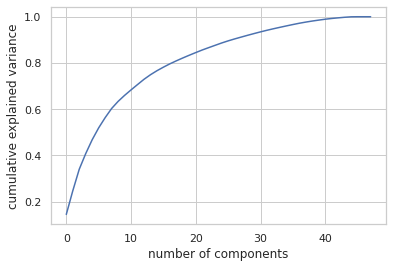

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.145235,0.145235
1,0.247078,0.101842
2,0.340589,0.093511
3,0.408186,0.067596
4,0.468249,0.060063
5,0.519526,0.051277
6,0.563625,0.044099
7,0.603226,0.039602
8,0.633914,0.030688
9,0.659927,0.026013


In [224]:
# code adapted from [https://towardsdatascience.com/machine-learning-step-by-step-6fbde95c455a]

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=48)
pca_test.fit(df_x_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=4, color='r', linestyle = '--', x=15, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(30))

There's no real point where it seems obvious to use only a certain number of principal components, so we'll stick with the original 27, which explain 90% of variance, for now. 

### Building some predictive models

#### Random Forest

The first model to be built is the random forest. To start off, we will use default parameters here.

In [225]:
from sklearn.ensemble import RandomForestClassifier

rfc_base = RandomForestClassifier(n_estimators=100, # default
                                  min_samples_split=2, #default
                                  min_samples_leaf=1, #default
                                  bootstrap=True, #default
                                  #probability=True
                                 )

# fit model opn training data
rfc_base.fit(principal_df_train, y_train)

# accuracy score of RFC model on training data
rfc_base.score(principal_df_train, y_train)

0.9586921617282148

So, even on the training data, the model is only around 96% accurate. This isn't great, but can be expected given that only 90% of variance is explained by the principal components chosen. Also, these may not be the best possible parameters to use.

To find the best possible parameters to use,we'' try some different parameters in some more models

In [226]:
rfc1 = RandomForestClassifier(n_estimators=500,
                              min_samples_split=2, #default
                              min_samples_leaf=1, #default
                              bootstrap=True, #default
                             )
# fit model opn training data
rfc1.fit(principal_df_train, y_train)

# accuracy score of RFC model on training data
rfc1.score(principal_df_train, y_train)

0.9587408164258259

Changing the number of trees to 500 had no effect, so now we will focus on the minimum number of samples required to split an internal node.

In [227]:
rfc2 = RandomForestClassifier(min_samples_split=4,
                              min_samples_leaf=1, #default
                              bootstrap=True, #default
                             )
# fit model opn training data
rfc2.fit(principal_df_train, y_train)

# accuracy score of RFC model on training data
rfc2.score(principal_df_train, y_train)

0.9579866686128545

This actually made the model worse

In [228]:
rfc3 = RandomForestClassifier(min_samples_leaf=2,
                              bootstrap=True, #default
                             )
# fit model opn training data
rfc3.fit(principal_df_train, y_train)

# accuracy score of RFC model on training data
rfc3.score(principal_df_train, y_train)

0.9518561767138617

As did this

In [229]:
rfc4 = RandomForestClassifier(bootstrap=False)

# fit model opn training data
rfc4.fit(principal_df_train, y_train)

# accuracy score of RFC model on training data
rfc4.score(principal_df_train, y_train)

0.9587408164258259

This had no effect

So, we will go ahead and test the default random forrest classifier on the test data. However, firswt, we should plot an ROC curve of the TP and FP rate of the model on the training data, and see if we can find a better threshold.

In [230]:
# copied from day 1 labs
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

# get predicted classes for training data
y_pred_rfc_train = rfc_base.predict(principal_df_train)

# get classification probabilities
y_pred_rfc_train_probs = rfc_base.predict_proba(principal_df_train)
y_pred_rfc_train_probs = y_pred_rfc_train_probs[:,1]

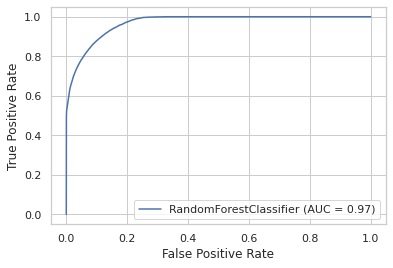

In [231]:
rfc_disp = plot_roc_curve(rfc_base, principal_df_train, y_train)
plt.show()

In [232]:
# # copied from [https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/]
# # calculate roc curves
# fpr, tpr, thresholds = roc_curve(y_train, y_pred_rfc_train_probs)
# # get the best threshold
# J = tpr - fpr
# ix = np.argmax(J)
# best_thresh = thresholds[ix]
# print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.357333, F-Score=0.722


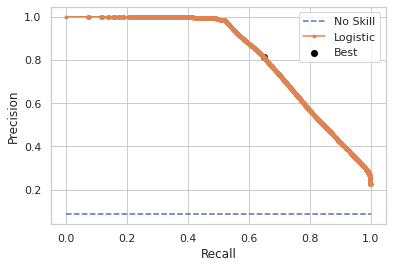

In [233]:
# adapted from [https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/]
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,accuracy_score
from matplotlib import pyplot

# calculate curve
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_rfc_train_probs)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_train[y_train==1]) / len(y_train)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

So, for the training data. the best F score was achieved at classification threshold 0.365. This threshold will eb used to classify the test set.

In [234]:
# get classification probabilities
y_pred_rfc_test_probs = rfc_base.predict_proba(principal_df_test)
#y_pred_rfc_test_probs = y_pred_rfc_test_probs[:,1]

# predicted class at this threshold
predicted_rfc_test = (y_pred_rfc_test_probs[:,1] >= thresholds[ix]).astype('int')
predicted_rfc_test


array([0, 0, 0, ..., 0, 0, 0])

In [235]:
# # get predicted classifications
# y_pred_rfc = rfc_base.predict(principal_df_test)

In [236]:
# accuracy score of RFC model on testing data
accuracy_score(predicted_rfc_test, y_test)

0.9143190775069333

The model correctly classified 93% of employees

In [237]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# confusion matrix for the model
confusion_mat = pd.DataFrame(
    confusion_matrix(y_test, predicted_rfc_test, labels=[0, 1]),
    index=['true:no', 'true:yes'], 
    columns=['pred:no', 'pred:yes']
)
    
    
confusion_mat

,pred:no,pred:yes
true:no,12081,448
true:yes,726,447


From the confusion matrix, we can see that the model successfully predicts most people who are not promoted, but it does not predict people who are promoted very well at all.

In [238]:
# calculate presicion
print("Precision:   ", precision_score(y_test, predicted_rfc_test))
# calculate recall
print("Recall:   ", recall_score(y_test, predicted_rfc_test))
# calculate F1 score
print("F1 score:   ", f1_score(y_test, predicted_rfc_test))

Precision:    0.4994413407821229
Recall:    0.38107416879795397
F1 score:    0.4323017408123791


The precision of this model wasn't too bad, but recall was pretty bad. F1 score, the weighted average of precision and recall, was pretty poor also.

In [239]:
# # copied from day 1 labs
# from sklearn.metrics import roc_curve, roc_auc_score

# y_pred_rfc_proba = rfc_base.predict_proba(principal_df_test)

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc_proba)
# auc_score = roc_auc_score(y_test, y_pred_rfc_proba)
# print(auc_score)

# from matplotlib import pyplot as plt
# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr, label='ROC')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

# plt.savefig("roc1")


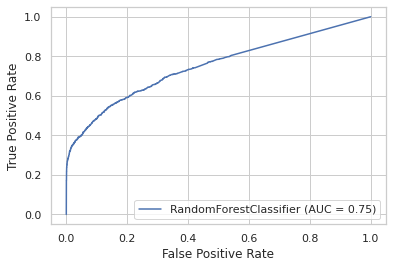

In [240]:
from sklearn.metrics import plot_roc_curve, accuracy_score

svc_disp = plot_roc_curve(rfc_base, principal_df_test, y_test)
plt.show()

The area under the curve is 0.76

#### Support Vector Machine

Next, we will try using a support vector machine (SVM) classifier to build a model.

In [241]:
from sklearn import svm

# call classifier, using dafault parameters
clf_base = svm.SVC()

# train model on training data
clf_base.fit(principal_df_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [242]:
# get accuracy score of the model
clf_base.score(principal_df_train, y_train)

0.9244879093076437

The default SVM classifier is only around 92% accurate on the training data. We will now try some other parameters.

In [243]:
# call classifier
clf1 = svm.SVC(kernel='linear')

# train model on training data
clf1.fit(principal_df_train, y_train)

# accuracy score of model on training data
clf1.score(principal_df_train, y_train)

0.9149759159246825

In [244]:
# call classifier
clf2 = svm.SVC(kernel='poly')

# train model on training data
clf2.fit(principal_df_train, y_train)

# accuracy score of model on training data
clf2.score(principal_df_train, y_train)

0.9260935143288085

In [245]:
# call classifier
clf3 = svm.SVC(kernel='sigmoid')

# train model on training data
clf3.fit(principal_df_train, y_train)

# accuracy score of model on training data
clf3.score(principal_df_train, y_train)

0.8535980148883374

So, marginally, the best kernel was the 'poly' kernel. However, this still only achieved around 93% accuracy on the training data. Let's try tweaking the 'poly' model a bit more

In [246]:
# call classifier
clf4 = svm.SVC(kernel='poly', degree = 8, probability=True)

# train model on training data
clf4.fit(principal_df_train, y_train)

# accuracy score of model on training data
clf4.score(principal_df_train, y_train)

0.9267746800953632

In [247]:
# call classifier
clf5 = svm.SVC(kernel='poly', degree = 2, probability=True)

# train model on training data
clf5.fit(principal_df_train, y_train)

# accuracy score of model on training data
clf5.score(principal_df_train, y_train)

0.9187709823383448

So, the 'poly' SVM model, of degree 8, marginally performs the best on the training data. We will now apply thiws to the testing data.

In [248]:
# make predictions
y_pred_svm = clf4.predict(principal_df_test)

# calculate accuracy of the model
print(accuracy_score(y_test, y_pred_svm)) 

0.9209604437308422


The model correctly classified 92.4% of employees.

In [249]:
# confusion matrix for the model
confusion_mat = pd.DataFrame(
    confusion_matrix(y_test, y_pred_svm, labels=[0, 1]),
    index=['true:no', 'true:yes'], 
    columns=['pred:no', 'pred:yes']
)
    
    
confusion_mat

,pred:no,pred:yes
true:no,12485,44
true:yes,1039,134


So, similarly to the random tree model above, the SBM classifier correctly classified most people that were promoted, but incorrectly classified most people that were not promoted.

In [250]:
# calculate presicion
print("Precision:   ", precision_score(y_test, y_pred_svm))
# calculate recall
print("Recall:   ", recall_score(y_test, y_pred_svm))
# calculate F1 score
print("F1 score:   ", f1_score(y_test, y_pred_svm))

Precision:    0.7528089887640449
Recall:    0.11423699914748509
F1 score:    0.19837157660991858


So, the SVM model had pretty high precision, but very low racall and F1 score. The model is good at predicting people who are not promoted, but very bad at predicting people who are promoted.

0.5553625733226452


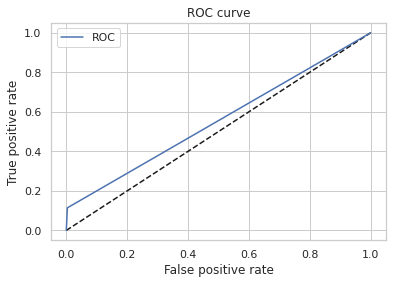

In [251]:
# copied from day 1 labs

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
auc_score = roc_auc_score(y_test, y_pred_svm)
print(auc_score)

from matplotlib import pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


The ROC curve and AUC score show that this model is pretty poor. The model performs only slightly better than a random model.